[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nilsjennissen/image-processing/blob/main/notebooks/profile_pic.ipynb)

# Create a pixelated Image

In [47]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image

# Show images as inline
%matplotlib inline

In [4]:
# The image we will use
im_path = '../images/image1.jpg'    # <----- Change this to your own image

# Import image
profile_pic = imageio.imread('../images/image1.jpg')

/var/folders/sl/c5pyww8j61j6_9_z4twp2ygc0000gn/T/ipykernel_90144/1919845228.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  profile_pic = imageio.imread('../images/image1.jpg')


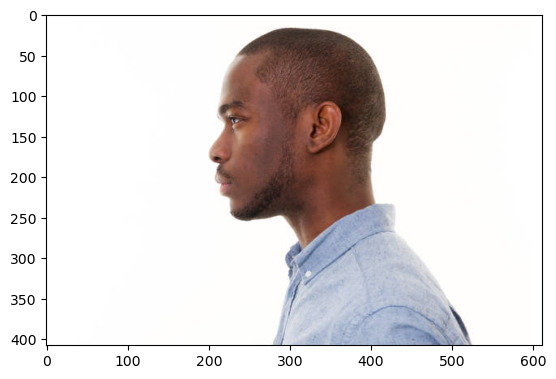

In [5]:
# Show the image
plt.imshow(profile_pic)

In [6]:
# Get the dimension sizes
dim = profile_pic.shape
dim

(408, 612, 3)

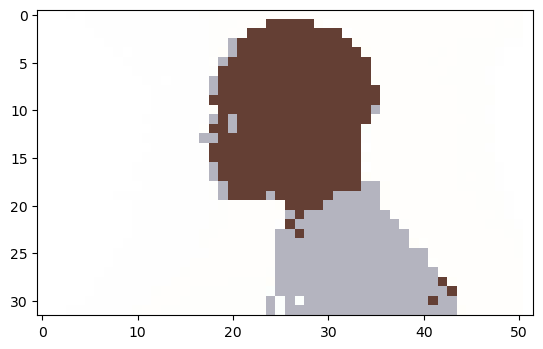

In [10]:
# Load image
image = Image.open('../images/image1.jpg')

# Reduce colors to 10 colors
image = image.quantize(colors=10, method=Image.MEDIANCUT)


# Resize the image to 32x40 pixels
image_scaled = image.resize((52, 32), Image.BILINEAR)

# Show the image
plt.imshow(image_scaled)

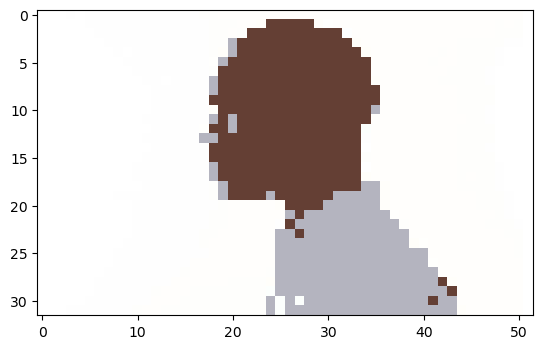

In [13]:
from PIL import Image

# Load image
image = Image.open('../images/image1.jpg')

# Reduce colors to 10 colors
image = image.quantize(colors=11, method=Image.MEDIANCUT)


# Resize the image to 32x40 pixels
image_scaled = image.resize((52, 32), Image.BILINEAR)

# Show the image
plt.imshow(image_scaled)

In [50]:
# Save the resized image
image_scaled.save('../images/profile_pic_px.png')

## Now let's build an individualised function for this

In [14]:
#Import Libraries
from PIL import Image
import matplotlib.pyplot as plt

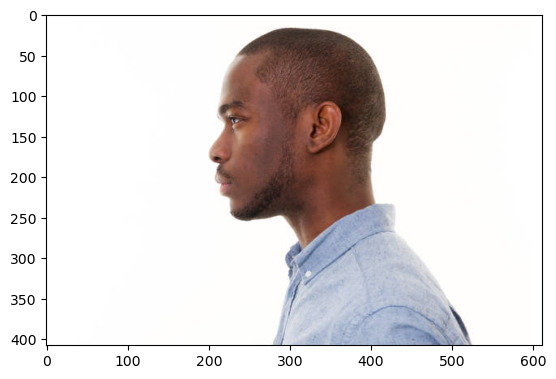

In [15]:
#Read image
img=Image.open('../images/image1.jpg')
#show image
plt.imshow(img)
plt.show()

In [21]:
small_img=img.resize((8,12),Image.BILINEAR)

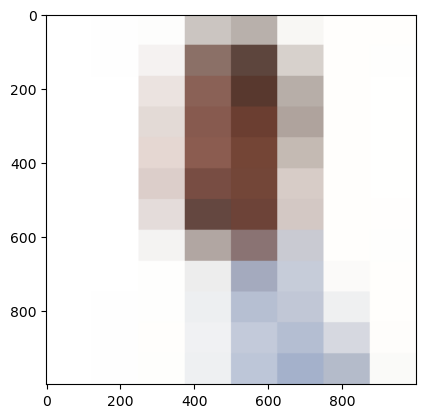

In [24]:
#resize
o_size=(1000,1000) #output size
res=small_img.resize(o_size,Image.NEAREST)
#save image
res.save('../images/profile_8x8.png')
#display image
plt.imshow(res)
plt.show()

In [25]:
def photo2pixelart(image, i_size, o_size):
    """
    image: path to image file
    i_size: size of the small image eg:(8,8)
    o_size: output size eg:(10000,10000)
    """
    #read file
    img=Image.open(image)

    # quantize with median
    img = img.quantize(colors=11,  kmeans=2)

    #convert to small image
    small_img=img.resize(i_size,Image.BILINEAR)

    #resize to output size
    res=small_img.resize(img.size, Image.NEAREST)

    #Save output image
    filename=f'profile_{i_size[0]}x{i_size[1]}.png'
    res.save(filename)

    #Display images side by side
    plt.figure(figsize=(16,10))
    #original image
    plt.subplot(1,2,1)
    plt.title('Original image', size=18)
    plt.imshow(img)   #display image
    plt.axis('off')   #hide axis
    #pixel art
    plt.subplot(1,2,2)
    plt.title(f'Pixel Art {i_size[0]}x{i_size[1]}', size=18)
    plt.imshow(res)
    plt.axis('off')
    plt.show()

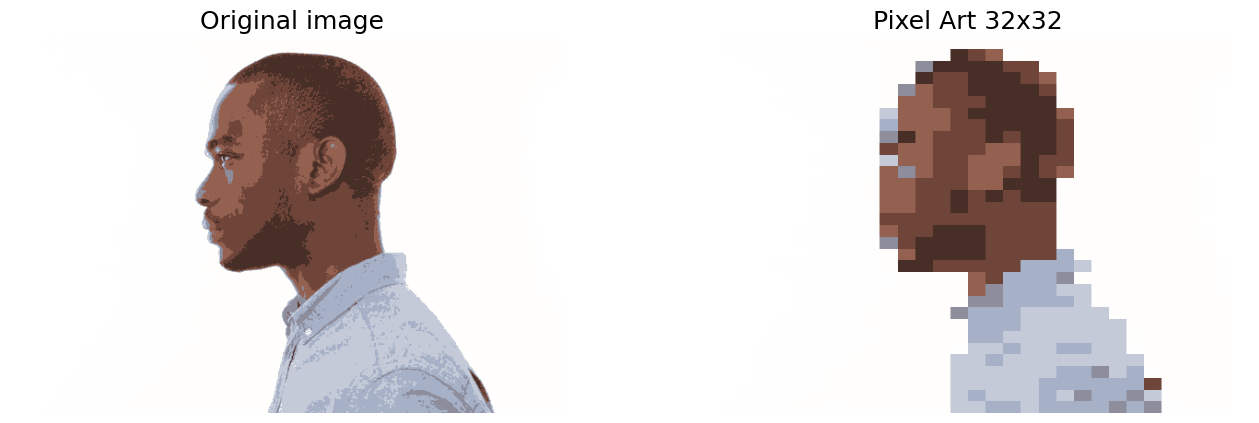

In [26]:
photo2pixelart(image='../images/image1.jpg',i_size=(32,32),
                    o_size=img.size)

## Recoloring the image

In [27]:
# Change color palette to the shades of a given color
from PIL import Image, ImageOps

# Load image
image = Image.open('../images/image1.jpg')

# Reduce colors to 10 colors
image = image.quantize(colors=11, method=Image.MEDIANCUT)

# Resize the image to 32x40 pixels
image_scaled = image.resize((32, 40), Image.BILINEAR)

img = image_scaled.convert("RGB")
d = img.getdata()

# Adjust all colors to a shade of this blue: #2f81f7
new_image = []
for item in d:

    # change all white (also shades of whites)
    # pixels to yellow
    if item[0] in list(range(200, 256)):
        new_image.append((255, 224, 100))
    else:
        new_image.append(item)

# update image data
img.putdata(new_image)

# save new image
img.save("color_changed.jpg")

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

def photo_pixelart_color(image_path, small_image_size, output_size):
    """
    Convert the image at `image_path` to pixel art of size `small_image_size`,
    and then resize it to `output_size`. Adjust all colors to a shade of blue.

    :param image_path: Path to the input image file
    :param small_image_size: Tuple representing the size of the small image, e.g. (8, 8)
    :param output_size: Tuple representing the desired output size, e.g. (10000, 10000)
    """

    # Read input image file
    input_image = Image.open(image_path)

    # Reduce color palette to 11 colors using median cut algorithm
    quantized_image = input_image.quantize(colors=11, kmeans=2)

    # Resize image to small image size
    small_image = quantized_image.resize(small_image_size, Image.BILINEAR)

    # Resize small image to output size
    resized_image = small_image.resize(input_image.size, Image.NEAREST)

    # Convert image to RGB format
    rgb_image = resized_image.convert("RGB")
    pixel_data = rgb_image.getdata()

    # Adjust all colors to a shade of blue (#2f81f7)
    adjusted_data = []
    for pixel in pixel_data:
        if pixel[0] in range(200, 256):
            adjusted_data.append((255, 224, 100))  # change white pixels to yellow
        else:
            adjusted_data.append(pixel)

    # Save output image
    output_filename = f'../images/profile_colored_{small_image_size[0]}x{small_image_size[1]}.png'
    rgb_image.putdata(adjusted_data)
    rgb_image.save(output_filename)

    # Display original and pixel art images side by side
    plt.figure(figsize=(16, 10))
    plt.subplot(1, 2, 1)
    plt.title('Original Image', size=18)
    plt.imshow(resized_image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(f'Pixel Art {small_image_size[0]}x{small_image_size[1]}', size=18)
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()


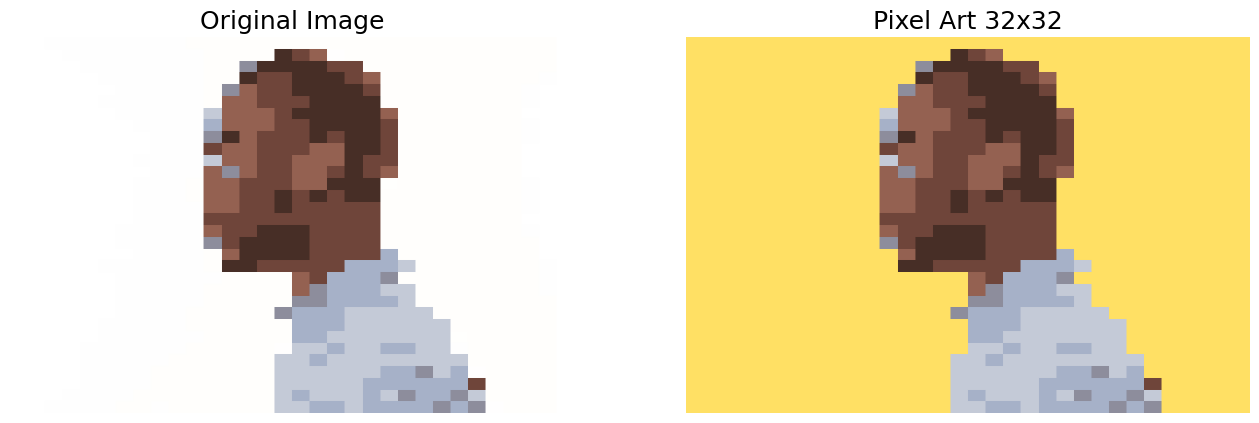

In [30]:
# Apply the function
photo_pixelart_color(image_path='../images/image1.jpg',small_image_size=(32,32),
                    output_size=img.size)

## Reading color data

In [34]:
# First we check the color palette for the uncolored image
from PIL import Image
import matplotlib.pyplot as plt

# Read input image file
input_image = Image.open('../images/image1.jpg')

# Reduce color palette to 11 colors using median cut algorithm
quantized_image = input_image.quantize(colors=11, kmeans=2)

# Resize image to small image size
small_image = quantized_image.resize((32, 32), Image.BILINEAR)

# Resize small image to output size
resized_image = small_image.resize(input_image.size, Image.NEAREST)

# Convert image to RGB format
rgb_image = resized_image.convert("RGB")

# Read rgb distinct colors
rgb_image.getcolors()

[(55571, (255, 255, 255)),
 (982, (255, 254, 254)),
 (11445, (166, 177, 200)),
 (9469, (148, 97, 81)),
 (3636, (141, 141, 156)),
 (19532, (111, 69, 58)),
 (79437, (255, 254, 252)),
 (40781, (254, 254, 254)),
 (14921, (196, 202, 215)),
 (13428, (71, 46, 38)),
 (494, (255, 255, 253))]

In [36]:
# Function to read the color palette of an image
def read_color_palette(image_path, small_image_size, color_count):
    """
    Read the color palette of the image at `image_path` and return a list of
    color names and a list of color RGB values.

    :param image_path: Path to the input image file
    :param small_image_size: Tuple representing the size of the small image, e.g. (8, 8)
    :return: Tuple of lists (color_names, color_rgb_values)
    """
    color_names_dict  = {}

    # Read input image file
    input_image = Image.open(image_path)

    # Reduce color palette to 11 colors using median cut algorithm
    quantized_image = input_image.quantize(colors=color_count, kmeans=2)

    # Resize image to small image size
    small_image = quantized_image.resize(small_image_size, Image.BILINEAR)

    # Resize small image to output size
    resized_image = small_image.resize(input_image.size, Image.NEAREST)

    # Convert image to RGB format
    rgb_image = resized_image.convert("RGB")

    # Read rgb distinct colors
    rgb_colors = rgb_image.getcolors()

    # Create lists of color names and color RGB values
    color_names = []
    color_rgb_values = []
    for color in rgb_colors:
        color_names.append(color_names_dict.get(color[1], ''))
        color_rgb_values.append(color[1])

    return color_names, color_rgb_values

In [37]:
# Apply the function
color_names, color_rgb_values = read_color_palette(image_path='../images/image1.jpg', small_image_size=(32,32), color_count=11)

In [105]:
color_rgb_values

[(232, 237, 242),
 (230, 235, 240),
 (220, 177, 169),
 (207, 155, 144),
 (166, 113, 102),
 (107, 65, 64),
 (66, 45, 53),
 (228, 232, 237),
 (188, 134, 123),
 (140, 90, 82),
 (14, 16, 39)]

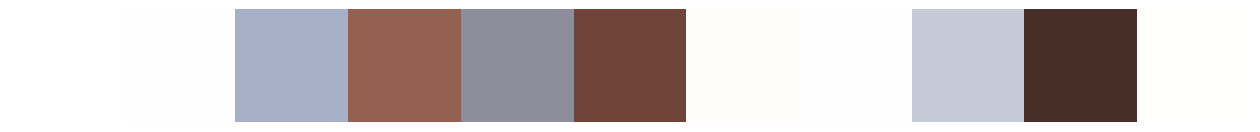

In [38]:
# Function to show a number of colors in a visualization
def show_colors(color_rgb_values):
    """
    Show the colors in `color_rgb_values` in a visualization.

    :param color_rgb_values: List of RGB values of colors to show
    """

    # Create a list of colors with the same length as `color_rgb_values`
    colors = [''] * len(color_rgb_values)

    # Create a figure with a color bar
    plt.figure(figsize=(16, 2))
    plt.imshow([color_rgb_values])
    plt.axis('off')
    plt.show()

show_colors(color_rgb_values)

In [39]:
# We can transform a list of RGB values to different shades of one color by using the hsl color space
# Function to transform one rgb value to a shade of a given rgb value with the same hue and round the number

import colorsys

def shift_color(input_color, target_color):
    """
    Shift the hue of `input_color` to match the hue of `target_color` while preserving luminosity.

    :param input_color: Tuple representing the RGB values of the input color
    :param target_color: Tuple representing the RGB values of the target color
    :return: Tuple representing the RGB values of the shifted color
    """

    # Convert RGB values to HSL values
    input_h, input_l, input_s = colorsys.rgb_to_hls(*(c / 255 for c in input_color))
    target_h, target_l, target_s = colorsys.rgb_to_hls(*(c / 255 for c in target_color))

    # Convert target HSL values to RGB values with the input color's luminosity
    shifted_color = colorsys.hls_to_rgb(target_h, input_l, target_s)

    # Convert RGB values back to the range [0, 255] and round to the nearest integer
    shifted_color = tuple([int(round(i * 255)) for i in shifted_color])

    return shifted_color

In [40]:
# Apply the function as a test
shift_color(input_color=(166, 113, 102), target_color=(47, 129, 247))

(22, 114, 246)

In [41]:
# Test function for the color_rgb_values
for color in color_rgb_values:
    print(f'{color} = {shift_color(input_color=color, target_color=(47, 129, 247))}')


(255, 255, 255) = (255, 255, 255)
(255, 254, 254) = (254, 254, 255)
(166, 177, 200) = (116, 171, 250)
(148, 97, 81) = (8, 95, 221)
(141, 141, 156) = (50, 131, 247)
(111, 69, 58) = (6, 70, 163)
(255, 254, 252) = (252, 253, 255)
(254, 254, 254) = (253, 254, 255)
(196, 202, 215) = (160, 197, 251)
(71, 46, 38) = (4, 45, 105)
(255, 255, 253) = (253, 254, 255)


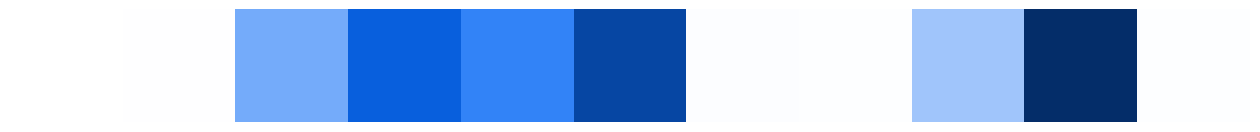

In [42]:
# Return a list of changed colors
changed_colors = []
for color in color_rgb_values:
    changed_colors.append(shift_color(input_color=color, target_color=(47, 129, 247)))

show_colors(changed_colors)

In [43]:
# Import the necessary modules  - works
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image

# Create your pixelated profile_pic with the github color scheme
colors = ['#0e1217', '#171b22', '#248636', '#2f81f7', '#dae1e8', '#e6edf3']
colors_rgb = [(14, 18, 23), (23, 27, 34), (36, 134, 54), (47, 129, 247), (218, 225, 232), (230, 237, 243)]
color_names = ['black', 'dark-grey', 'green', 'blue', 'light-grey', 'white']
application = ['background', 'background-lines', 'action', 'highlight', 'header', 'text']


# Function to return a pixelated image with the github color scheme (grey for the background, and shades of blue for the rest)
def pixelate_profile(image_path, small_image_size, output_size, color_num=11, color_change=(36, 134, 54)):
    """
    Convert the image at `image_path` to pixel art of size `small_image_size`,
    and then resize it to `output_size`. Adjust all colors to a shade of blue.

    :param image_path: Path to the input image file
    :param small_image_size: Tuple representing the size of the small image, e.g. (8, 8)
    :param output_size: Tuple representing the desired output size, e.g. (10000, 10000)
    """

    # Read input image file
    input_image = Image.open(image_path)

    # Reduce color palette to 11 colors using median cut algorithm
    quantized_image = input_image.quantize(colors=11, kmeans=2)

    # Resize image to small image size
    small_image = quantized_image.resize(small_image_size, Image.BILINEAR)

    # Resize small image to output size
    resized_image = small_image.resize(input_image.size, Image.NEAREST)

    # Convert image to RGB format
    rgb_image = resized_image.convert("RGB")
    pixel_data = rgb_image.getdata()

    # Adjust bright colors to black and
    adjusted_data = []
    for pixel in pixel_data:
        if pixel[0] in range(225, 256):
            adjusted_data.append((13, 17, 23, 0))  # change white pixels to background color
        # Else adjust
        elif pixel[0] in range(0, 225):
            adjusted_data.append(shift_color(pixel, color_change))
        else:
            adjusted_data.append(pixel)

    # Save output image
    output_filename = f'../images/image{small_image_size[0]}x{small_image_size[1]}.png'
    rgb_image.putdata(adjusted_data)
    rgb_image.save(output_filename)

    # Display original and pixel art images side by side
    plt.figure(figsize=(16, 10))
    plt.subplot(1, 2, 1)
    plt.title('Original Image', size=18)
    plt.imshow(resized_image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(f'Pixel Art {small_image_size[0]}x{small_image_size[1]}', size=18)
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

    return rgb_image


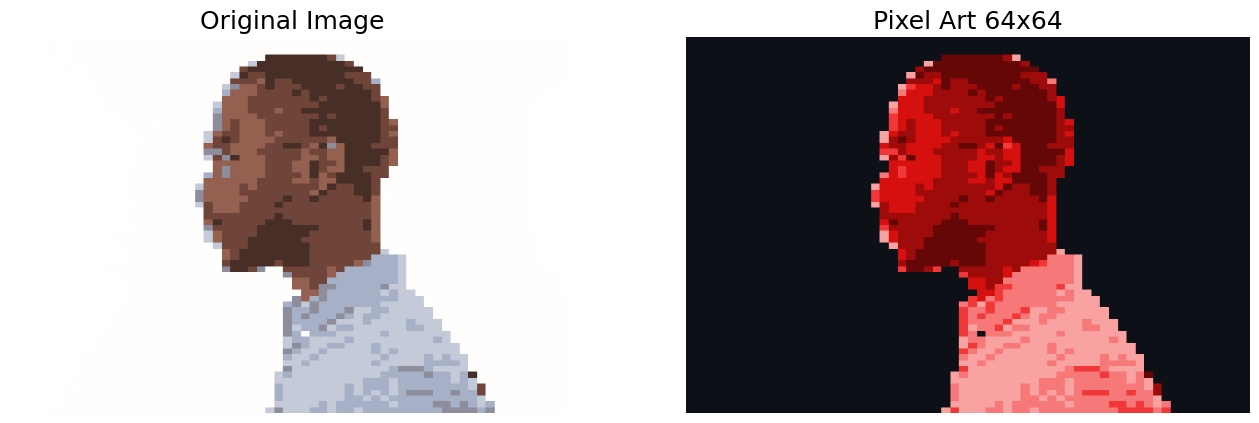

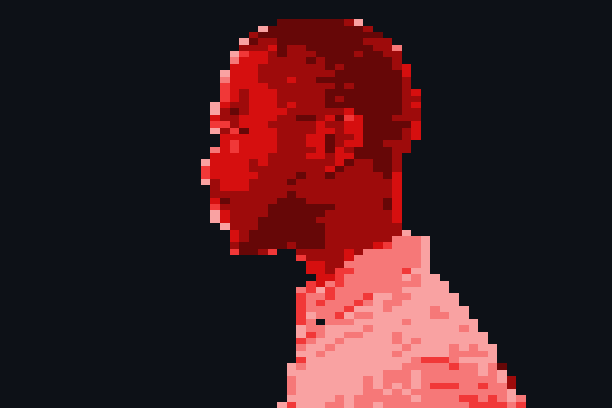

In [44]:
# Apply the function
pixelate_profile(image_path='../images/image1.jpg', small_image_size=(64,64), output_size=img.size, color_num=9, color_change=(215, 15, 15))


In [46]:
# Create a one colored background in the desired size and place the pixelated image on top of it

# Outfile with name, size and color
name = 'image_red'
size = '64x64'
color = 'red'
outfile = f'../images/{name}_{size}_{color}.png'

# Create a background image
background = Image.new('RGB', (1800, 2000), color=(13, 17, 23))

# Open the pixelated image
blue = Image.open(outfile)
green = Image.open(outfile)
red = Image.open(outfile)

# All images transparent
blue = blue.convert("RGBA")
green = green.convert("RGBA")
red = red.convert("RGBA")


# Paste the pixelated image centered on top of the background -consider bad transparency
background.paste(red, (450, 400))
background.paste(green, (450, 350))
background.paste(blue, (450, 300))

# Save the image
background.save(outfile)


FileNotFoundError: [Errno 2] No such file or directory: '../images/image_red_64x64_red.png'